Battery Operations to Utilitize NEM Excess Generation

In [1]:
import os, sys
PWD = os.getenv('PWD')
os.chdir(PWD)
sys.path.insert(0, os.getenv('PWD'))
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "local_settings.py")
import django
django.setup()

In [2]:
from datetime import timedelta
import numpy as np

from beo_datastore.libs.battery import Battery, FixedScheduleBatterySimulation
from beo_datastore.libs.battery_schedule import PeakShavingScheduleOptimizer
from beo_datastore.libs.plot_intervalframe import plot_frame288_monthly_comparison, plot_intervalframe

from load.customer.models import Meter

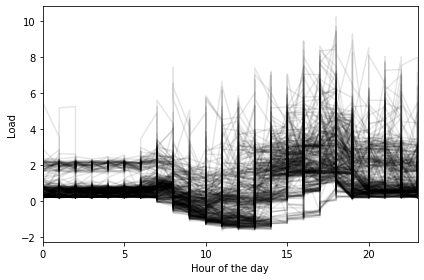

In [3]:
# Get Meter Data
meter = Meter.objects.get(id=1)

# Configure Battery
battery = Battery(rating=5, discharge_duration=timedelta(hours=4), efficiency=0.9)

plot_intervalframe(meter.intervalframe)

In [4]:
# Generate optimal charge/discharge schedules using exports only
exports_charge_schedule, exports_discharge_schedule = PeakShavingScheduleOptimizer.optimize_schedules_with_exports(
    battery=battery,
    load_intervalframe=meter.intervalframe,
    multiprocess=True,
)
# Generate optimal charge/discharge schedules using exports and grid
grid_charge_schedule, grid_discharge_schedule = PeakShavingScheduleOptimizer.optimize_schedules_with_grid(
    battery=battery,
    load_intervalframe=meter.intervalframe,
    multiprocess=True,
)

In [5]:
# Examine Charge/Discharge Schedules
# exports_charge_schedule.dataframe
exports_discharge_schedule.dataframe
# grid_charge_schedule.dataframe
# grid_discharge_schedule.dataframe

,1,2,3,4,5,6,7,8,9,10,11,12
0,5,4,4,5,3,5,4,5,4,4,5,4
1,5,4,4,5,3,5,4,5,4,4,5,4
2,5,4,4,5,3,5,4,5,4,4,5,4
3,5,4,4,5,3,5,4,5,4,4,5,4
4,5,4,4,5,3,5,4,5,4,4,5,4
5,5,4,4,5,3,5,4,5,4,4,5,4
6,5,4,4,5,3,5,4,5,4,4,5,4
7,5,4,4,5,3,5,4,5,4,4,5,4
8,5,4,4,5,3,5,4,5,4,4,5,4
9,5,4,4,5,3,5,4,5,4,4,5,4


In [6]:
# Run Battery Operations
exports_intervalframe = FixedScheduleBatterySimulation(
    battery=battery,
    load_intervalframe=meter.intervalframe,
    charge_schedule=exports_charge_schedule,
    discharge_schedule=exports_discharge_schedule,
)
exports_intervalframe.generate_full_sequence()
grid_intervalframe = FixedScheduleBatterySimulation(
    battery=battery,
    load_intervalframe=meter.intervalframe,
    charge_schedule=grid_charge_schedule,
    discharge_schedule=grid_discharge_schedule,
)
grid_intervalframe.generate_full_sequence()

In [7]:
# Examine Impact on Peak Load
display(exports_intervalframe.compare_peak_loads())
display(grid_intervalframe.compare_peak_loads())

,before,after,net
1,8.528,8.528,0.000
2,8.752,8.752,0.000
3,9.304,6.848,-2.456
4,10.244,5.244,-5.000
5,7.072,7.072,0.000
6,9.704,7.264,-2.440
7,8.896,4.000,-4.896
8,9.452,5.000,-4.452
9,9.444,4.444,-5.000
10,8.900,4.000,-4.900


,before,after,net
1,8.528,3.528,-5.00
2,8.752,3.752,-5.00
3,9.304,4.304,-5.00
4,10.244,5.244,-5.00
5,7.072,2.072,-5.00
6,9.704,4.704,-5.00
7,8.896,3.896,-5.00
8,9.452,4.452,-5.00
9,9.444,4.444,-5.00
10,8.900,3.900,-5.00


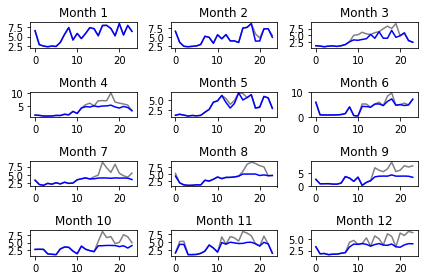

In [8]:
# Graph Impact on Peak Load
plot_frame288_monthly_comparison(
    exports_intervalframe.load_intervalframe.maximum_frame288,
    exports_intervalframe.post_intervalframe.maximum_frame288
)

In [9]:
# Examine Battery Operations per Interval
exports_intervalframe.combined_dataframe
# grid_intervalframe.combined_dataframe

,kw,charge,capacity,state of charge,load kw
2018-01-01 00:00:00,0.0,0.0,20.0,0.000,0.808
2018-01-01 00:15:00,0.0,0.0,20.0,0.000,2.300
2018-01-01 00:30:00,0.0,0.0,20.0,0.000,2.288
2018-01-01 00:45:00,0.0,0.0,20.0,0.000,2.332
2018-01-01 01:00:00,0.0,0.0,20.0,0.000,2.312
2018-01-01 01:15:00,0.0,0.0,20.0,0.000,2.252
2018-01-01 01:30:00,0.0,0.0,20.0,0.000,1.884
2018-01-01 01:45:00,0.0,0.0,20.0,0.000,1.956
2018-01-01 02:00:00,0.0,0.0,20.0,0.000,2.268
2018-01-01 02:15:00,0.0,0.0,20.0,0.000,1.912
